##  Importing base packages

In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.linear_model import LogisticRegression

In [2]:
# Assigning working directory
os.getcwd()
os.chdir("C:/Users/HP/OneDrive - Michigan State University/Masters - Data Science/MSU/Fall/Data Mining/Project")

## Importing data, data was already split into 80% train and 20% test csv, so no further splitting

In [3]:
train=pd.read_csv("Train telecom.csv",index_col=0)
test=pd.read_csv("Test telecom.csv",index_col=0)

In [4]:
print(np.array(train.shape)[0]+np.array(test.shape)[0])


3333


In [5]:
#Drop area code since not likely to influence churn
train=train.drop(["Area code"],axis=1)
test=test.drop(["Area code"],axis=1)
list(train.columns)

['Account length',
 'International plan',
 'Voice mail plan',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
 'Churn']

In [6]:
#Replacing Yes/No values with 1 and 0
train["International plan"] = train["International plan"].replace({'Yes' :1, 'No':0}).astype(int)
train["Voice mail plan"] = train["Voice mail plan"].replace({'Yes':1, 'No':0}).astype(int)

test["International plan"] = test["International plan"].replace({'Yes':1,'No':0}).astype(int)
test["Voice mail plan"] = test["Voice mail plan"].replace({'Yes':1,'No':0}).astype(int)


In [7]:
#Replacing True/False values with 1 and 0
train["Churn"] = train["Churn"].replace({True:1,False:0}).astype(int)

test["Churn"] = test["Churn"].replace({True:1,False:0}).astype(int)

#You could also use LabelEncoder if classes are more than 2, and base class is automatically the first class

Example:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Region_by_cha'] =le.fit_transform(data['Region_by_cha'])
data['Region'] =le.fit_transform(data['Region'])
data['Division'] =le.fit_transform(data['Division'])


In [8]:
train.head(4)

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
State,,,,,,,,,,,,,,,,,,
KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0


## Standardising X

In [9]:
X_train = train.drop(["Churn"], axis=1)
X_test = test.drop(["Churn"],axis=1)


In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
# We remove the target class(a categorical variable) before standardising the data
scaler.fit(X_train)
X_train=scaler.transform(X_train)

scaler.fit(X_test)
X_test =scaler.transform(X_test)

In [11]:
X_test

array([[ 0.34712707, -0.29380132, -0.6288064 , ..., -0.21274705,
        -0.54771446, -0.4230984 ],
       [-0.92773053, -0.29380132, -0.6288064 , ...,  0.5935159 ,
         0.87784318,  1.82855024],
       [ 1.42585272, -0.29380132, -0.6288064 , ...,  1.80291033,
        -1.72247956,  1.82855024],
       ...,
       [-1.05031299, -0.29380132, -0.6288064 , ...,  1.39977885,
         1.04943809,  1.0780007 ],
       [ 1.37681974, -0.29380132, -0.6288064 , ..., -0.21274705,
         0.48185495, -0.4230984 ],
       [ 1.98973205,  3.40366063, -0.6288064 , ...,  2.2060418 ,
        -1.86767524,  0.32745115]])

## Assigning 'y'

In [12]:
y_train=train.loc[:,'Churn']
y_test = test.loc[:, "Churn"]

## Modelling

This section includes several models:
1. Logistic Regression (No penalty)
2. Ridge (Logistic regression with 'l2' penalty)
3. RidgeClassifier (Logistic regression with 'l2' penalty,includes class weight balancing in algorithm)
4. Lasso (Logistic regresison with 'l1' penalty)

And other Classifiers 

5. Random Forest,
6. Support Vector Machine, 
7. MLP Classifier, 
8. K Nearest Neighbor, 
9. Gradient Boosting Classifier

### Base Model = Logistic Regression

In [13]:
# Import some necessary modelling packages to start with

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix

### Define Evaluation Metrics Function
Define Function to evaluate models using Precision, Accuracy and Recall as metrics, with Recall as main metric to look out for

In [14]:
def evaluate(y_test, y_pred,model_initials):
    cm  = confusion_matrix(y_test, y_pred)
    num_correct = sum(cm[i][i] for i in range(1))
    acc = num_correct/cm.sum()
    
    #Precision = TruePositives /(TruePositives + FalsePositives)
    #Out of all positive predictions, what % is actually positive 
    prec= cm[1][1]/(cm[1][1] +cm[0][1])#cm[row][column] if dataframe = cm_df.iloc[row][column]
   
    #recall= true positives/(true positives + false negatives)
    #Out of all actual positives what % is correctly predicted as +ve
    
    recall = cm[1][1]/(cm[1][1]+cm[1][0]) 
   
    global df
    
    evaluation = {
    'Precision': [prec],
    'Accuracy': [acc],
    'Recall': [recall]
    }
    
    df=pd.DataFrame(evaluation)
    
    df = (df*100).round(1)  # changing values to %
    
    df.index=[model_initials] #model_initials has to be specified as a string


    return df

## 1. Logistic Regression

### Without class balancing
#### Our target variable is imbalanced, and running the model without adjusting the class weights is expected to have low predicting power for the lower represented churn class ="yes" and it does. This is reflected in the low Recall. Overall accuracy is high because the model is better at predicting the majority class, the none churners, but our objective in this model is to predict churn

In [15]:
lr = LogisticRegression(penalty='none', random_state=1,max_iter=1000)
lr = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
cm  = confusion_matrix(y_test, y_pred)
Eval_LR = evaluate(y_test, y_pred,'Logistic_Regression') # Eval_LR stands for Evaluation LogisticRegression

print(cm)
precision = precision_score(y_test, y_pred, average='binary')


Eval_LR 

[[550  22]
 [ 76  19]]


,Precision,Accuracy,Recall
Logistic_Regression,46.3,82.5,20.0


### With Class Balancing   
#### After class_weight of the target variable is balanced in the background, the 'Recall' metric is expected to increase and it does - significantly. The model is better at predicting the lower represented class we are interested in of customers who churn.

In [16]:
### Logistic Regression With class_weight ="balanced" argument that balances imbalanced 'Churn' classes in the background

lr = LogisticRegression(penalty='none',class_weight="balanced", random_state=1, max_iter=1000)
lr = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
cm  = confusion_matrix(y_test, y_pred)
Eval_LR_Bal = evaluate(y_test, y_pred,"LR_balanced")

print(cm)

Eval_LR_Bal

[[445 127]
 [ 24  71]]


,Precision,Accuracy,Recall
LR_balanced,35.9,66.7,74.7


# Smote Oversampling

Can SMOTE give us higher Recall than the class_weight argument? SMOTE oversampling creates new data points and thus balances classes of "yes" and "no" within target variable : customer 'Churn' 

In [17]:
from imblearn.over_sampling import SMOTE


os = SMOTE(random_state=0)

columns = train.columns[:-1]
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y= pd.DataFrame(data=os_data_y,columns=['Churn'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no churn in oversampled data",len(os_data_y[os_data_y['Churn']==0]))
print("Number of churn",len(os_data_y[os_data_y['Churn']==1]))
print("Proportion of no churn data in oversampled data is ",len(os_data_y[os_data_y['Churn']==0])/len(os_data_X))
print("Proportion of churn data in oversampled data is ",len(os_data_y[os_data_y['Churn']==1])/len(os_data_X))

length of oversampled data is  4556
Number of no churn in oversampled data 2278
Number of churn 2278
Proportion of no churn data in oversampled data is  0.5
Proportion of churn data in oversampled data is  0.5


### Assigning smote X_train and y_train from SMOTE oversampled original X_train and y_train data sets

In [18]:
X_train_smote =os_data_X[columns]
y_train_smote =os_data_y['Churn']

## Logistic Regression after SMOTE

#### After SMOTE oversampling, we get the highest recall compared to results after class_weight='balanced' argument or without any class weight adjustment.

In [19]:
lr = LogisticRegression(penalty='none',class_weight="balanced", random_state=1,max_iter=1000)
lr = lr.fit(X_train_smote, y_train_smote)
y_pred = lr.predict(X_test)
cm  = confusion_matrix(y_test, y_pred)
Eval_LR_SMOTE = evaluate(y_test, y_pred,"LogisticRegression_SMOTE")

print(cm)
print(Eval_LR_SMOTE)


[[445 127]
 [ 22  73]]
                          Precision  Accuracy  Recall
LogisticRegression_SMOTE       36.5      66.7    76.8


### Does SMOTE Make a Difference?

Comparison of Logistic Regression Performance: 

1. Without adjusting for classweights, 
2. After class_weight argument used to adjust weights to "balanced" 
3. SMOTE Oversampling

SMOTE Oversampling gives the highest recall which is our key metric. Though not the main focus, its accuracy and precision are competitive as well

In [20]:
LR_Comparison = Eval_LR.append([Eval_LR_Bal,Eval_LR_SMOTE])

LR_Comparison= round(LR_Comparison.sort_values(by="Recall" , ascending=False),2)

LR_Comparison

,Precision,Accuracy,Recall
LogisticRegression_SMOTE,36.5,66.7,76.8
LR_balanced,35.9,66.7,74.7
Logistic_Regression,46.3,82.5,20.0


### For all subsequent models, SMOTE X_train and y_train sets are used as training data, after establishing SMOTE gives the highest recall as a balancing technique.

In [21]:
X_train = X_train_smote
y_train = y_train_smote

## Confusion Matrix

Confusion matrix, without normalization
[[445 127]
 [ 22  73]]
Normalized confusion matrix
[[0.77797203 0.22202797]
 [0.23157895 0.76842105]]


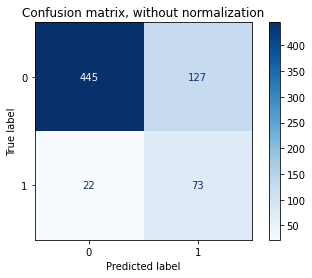

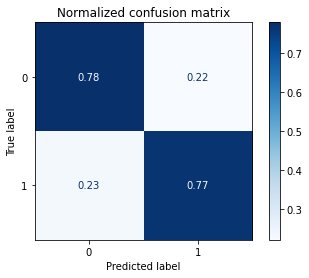

In [22]:
import matplotlib.pyplot as plt

class_names= train["Churn"].unique()
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(lr, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## 2. Ridge

In [23]:
### Ridge Regression 
lr = LogisticRegression(penalty='l2',random_state=1,max_iter=1000)
lr = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
cm  = confusion_matrix(y_test, y_pred)
Eval_Ridge = evaluate(y_test, y_pred, "Ridge_Regression")

print(cm)
print(Eval_Ridge)

[[445 127]
 [ 22  73]]
                  Precision  Accuracy  Recall
Ridge_Regression       36.5      66.7    76.8


## 3. RidgeClassifier
Performs exactly the same as Ridge with SMOTE oversampling, however performs better on raw data unadjusted for class imbalance (I.e. without SMOTE or class_weight adjustments). The RidgeClassifier seems to be Ridge with oversampling in the background

In [24]:
from sklearn.linear_model import RidgeClassifier
lr = RidgeClassifier(alpha=0.1, solver='saga', random_state=1,max_iter=1000)
lr.fit(X_train_smote, y_train_smote)
y_pred = lr.predict(X_test)
cm  = confusion_matrix(y_test, y_pred)
Eval_RidgeClassifier = evaluate(y_test, y_pred,"RidgeClassifier")

print(cm)
print(Eval_RidgeClassifier)

[[446 126]
 [ 22  73]]
                 Precision  Accuracy  Recall
RidgeClassifier       36.7      66.9    76.8


## 4. Lasso

In [25]:
### Lasso Regression

lr = LogisticRegression(penalty='l1', solver='saga', random_state=1, max_iter = 1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
cm  = confusion_matrix(y_test, y_pred)
Eval_Lasso = evaluate(y_test, y_pred, "Lasso_Regression")

print(cm)
print(Eval_Lasso)

[[446 126]
 [ 22  73]]
                  Precision  Accuracy  Recall
Lasso_Regression       36.7      66.9    76.8


C:\Users\HP\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


## 5. SVM

In [26]:
from sklearn.svm import SVC 
svm = SVC(kernel = 'linear', C = 1, random_state=1)
svm.fit(X_train, y_train) 
y_pred = svm.predict(X_test)
Eval_SVM = evaluate(y_test, y_pred,"Support_Vector_Machine")
#cm  = confusion_matrix(y_test, y_pred)
print(cm)
print(Eval_SVM)

[[446 126]
 [ 22  73]]
                        Precision  Accuracy  Recall
Support_Vector_Machine       36.0      66.3    76.8


In [27]:
## SVM with classes adjusted
from sklearn.svm import SVC 
svm = SVC(kernel = 'linear', C = 1, class_weight={1: 4}, random_state=1)
svm.fit(X_train, y_train) 
y_pred = svm.predict(X_test)
Eval_SVM_2 = evaluate(y_test, y_pred,"SVM_weights_adjusted")
#cm  = confusion_matrix(y_test, y_pred)
print(cm)
print(Eval_SVM_2)

[[446 126]
 [ 22  73]]
                      Precision  Accuracy  Recall
SVM_weights_adjusted       21.1      35.4    94.7


## 6. Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,min_samples_split=7, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
Eval_RF = evaluate(y_test, y_pred,"Random_Forest")
cm  = confusion_matrix(y_test, y_pred)
print(cm)
print(Eval_RF)

[[534  38]
 [ 15  80]]
               Precision  Accuracy  Recall
Random_Forest       67.8      80.1    84.2


## 7. MLP Classifier

In [29]:
from sklearn.neural_network import MLPClassifier

In [30]:
mlp = MLPClassifier(alpha=0.01, batch_size=200, hidden_layer_sizes=(700,),\
                    learning_rate='adaptive', max_iter=500, random_state=1)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
Eval_MLP = evaluate(y_test, y_pred,"MLP_Classifier")
cm  = confusion_matrix(y_test, y_pred)
print(cm)
print(Eval_MLP)

[[549  23]
 [ 33  62]]
                Precision  Accuracy  Recall
MLP_Classifier       72.9      82.3    65.3


## 8. KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(weights = "distance")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
Eval_KNN = evaluate(y_test, y_pred,"K_Nearest_Neighbor")
#precision_score(y_test,y_pred, average='binary')
cm  = confusion_matrix(y_test, y_pred)

print(cm)
Eval_KNN

[[471 101]
 [ 28  67]]


,Precision,Accuracy,Recall
K_Nearest_Neighbor,39.9,70.6,70.5


## 9. Gradient Boosting Classifier

Ensemble method that combines a number of weaker regression trees to build one powerful classifier

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
Eval_gb_untuned = evaluate(y_test, y_pred,"GradientBoosting_untuned")
cm  = confusion_matrix(y_test, y_pred)
print(cm)
print(Eval_gb_untuned)

[[106 466]
 [  3  92]]
                          Precision  Accuracy  Recall
GradientBoosting_untuned       16.5      15.9    96.8


In [34]:
learning_rate = [0.01, 0.05, 0.1, 0.5, 0.8]
n_estimators = [5, 10, 20, 50, 100, 150]
min_samples_split = [2,5,7,10,20]

param_list = []

for learn_rate in learning_rate:
    for ne in n_estimators:
        for mss in min_samples_split:
            param_list.append([learn_rate, ne, mss])
                
len(param_list)

150

In [35]:
perf_df = pd.DataFrame(param_list, columns=['learning_rate', 'n_estimators', 'min_sample_split'])

recall = []
count = 0
for param in param_list:
    count += 1
    if count%30 == 0:
        print(count)
    gb = GradientBoostingClassifier(learning_rate=param[0], n_estimators=param[1],\
                                    min_samples_split=param[2], random_state=1)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    calc = recall_score(y_test, y_pred)
    recall.append(calc)
    
perf_df['recall'] = recall
perf_df.head()

30
60
90
120
150


,learning_rate,n_estimators,min_sample_split,recall
0,0.01,5,2,0.778947
1,0.01,5,5,0.778947
2,0.01,5,7,0.778947
3,0.01,5,10,0.778947
4,0.01,5,20,0.778947


In [36]:
perf_df[perf_df.recall == perf_df.recall.max()]

,learning_rate,n_estimators,min_sample_split,recall
82,0.1,100,7,0.978947
83,0.1,100,10,0.978947
87,0.1,150,7,0.978947
88,0.1,150,10,0.978947
100,0.5,20,2,0.978947
101,0.5,20,5,0.978947
102,0.5,20,7,0.978947
103,0.5,20,10,0.978947
106,0.5,50,5,0.978947
107,0.5,50,7,0.978947


In [37]:
gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, min_samples_split=7, random_state=1)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
Eval_gb = evaluate(y_test, y_pred,"GradientBoosting_tuned")
cm  = confusion_matrix(y_test, y_pred)
print(cm)
print(Eval_gb)

[[ 78 494]
 [  2  93]]
                        Precision  Accuracy  Recall
GradientBoosting_tuned       15.8      11.7    97.9


In [133]:
df_Evaluation = Eval_LR_SMOTE.append([Eval_Ridge,Eval_RidgeClassifier,
                                                  Eval_Lasso,Eval_RF, Eval_SVM,Eval_MLP, Eval_KNN,Eval_gb])
                                      
df_Evaluation = df_Evaluation.sort_values(by ='Recall',ascending = False)

In [134]:
df_Evaluation

,Precision,Accuracy,Recall
GradientBoosting_tuned,15.8,11.7,97.9
Random_Forest,67.8,80.1,84.2
LogisticRegression_SMOTE,36.5,66.7,76.8
Ridge_Regression,36.5,66.7,76.8
RidgeClassifier,36.7,66.9,76.8
Lasso_Regression,36.7,66.9,76.8
Support_Vector_Machine,36.0,66.3,76.8
K_Nearest_Neighbor,39.9,70.6,70.5
MLP_Classifier,72.9,82.3,65.3


In [135]:
df_Evaluation=df_Evaluation.reset_index()
df_Evaluation= df_Evaluation.rename(columns = {"index":"Model"})

In [136]:
df_Evaluation

,Model,Precision,Accuracy,Recall
0,GradientBoosting_tuned,15.8,11.7,97.9
1,Random_Forest,67.8,80.1,84.2
2,LogisticRegression_SMOTE,36.5,66.7,76.8
3,Ridge_Regression,36.5,66.7,76.8
4,RidgeClassifier,36.7,66.9,76.8
5,Lasso_Regression,36.7,66.9,76.8
6,Support_Vector_Machine,36.0,66.3,76.8
7,K_Nearest_Neighbor,39.9,70.6,70.5
8,MLP_Classifier,72.9,82.3,65.3


## Visual of Model Performance

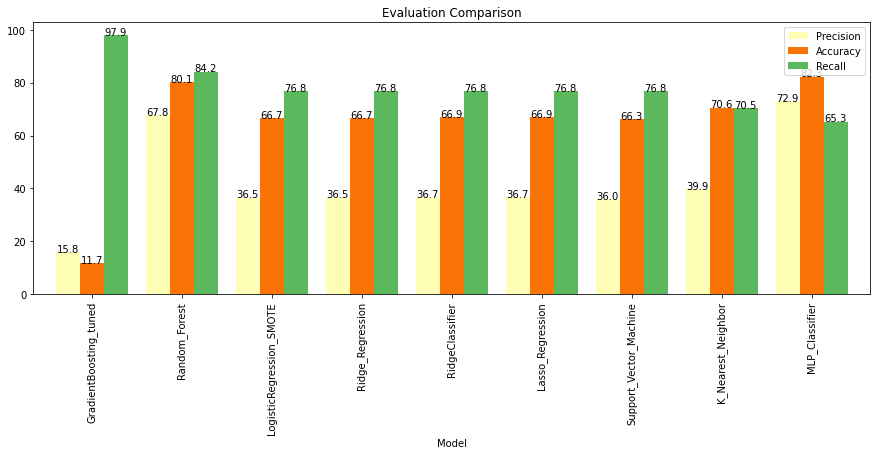

In [137]:
colors_list = ['#fffeb6','#f97306','#5cb85c']
plot= df_Evaluation.plot(kind="bar", x="Model",figsize=(15,5),color=colors_list,width = 0.8)
plt.title("Evaluation Comparison")
plt.xlabel("Model")

# Add this loop to add the annotations
for p in plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plot.annotate(f'{height}', (x + width/2, y + height), ha='center')
    
